In [1]:
import os as operating_system
import sys as system
import warnings
if not system.warnoptions:
    warnings.simplefilter("ignore")
    
import pandas as pd # First, I import all of the Python libraries. Let's take a quick look at these libraries. 
import numpy as np  # Pandas is a data processing library. NumPy is for n-dimensional arrays, 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score  # This labraries is used for display classification report.  
import tensorflow as tf  # TensorFlow seems to be the best library of the everyone even though it was designed to be user-friendly. 
from tensorflow import keras  
import pickle            # Pickles seems to be a Python item serializer & de-serializer which is also known as organising or straightening.
from sklearn.ensemble import RandomForestClassifier  # this classifier is used for feature selection with SFS, 
import matplotlib.pyplot as plt # and matplotlib and NumPy both have similar viewing capabilities.
import pylab    # for interacting using arrays & arithmetic

from xgboost import XGBClassifier # XGBclassifier stands for Extreme Gradient Boosting
import lightgbm as lgb    # LGBclassifier stands for  lightweight gradient boosting machines
import xgboost as xgb # same as XGBclassifier and XGB stands for Extreme Gradient Boosting
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # Sfs is stands for Sequential features Selection. 

In [2]:
# Next,  We can now import a CSV file to read the Phishing attack dataset and view its contents. 
# We can see how utilising a spreadsheet to store data and information can be beneficial.
# To check information, we can utilise the info() method.
# The describe() function can be used to explain a dataset.
# In this situation, a new Def function can be created to choose useful qualities.
# remove null values. There could be a lot of notice data in the dataset,  
# Machine learning can deal with null or missing values in a variety of ways. 
# now be used to organise our disorganised info. The function to use is 'data.isna().sum()'.

In [3]:
attack = pd.read_csv('Dataset.csv', na_values={'lable': ["not available", "n.a."]})
columns = ['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length','HTTPS_token','Favicon','port','Request_URL','URL_of_Anchor','Links_in_tags','SFH','Submitting_to_email','Abnormal_URL','Redirect','on_mouseover','RightClick','popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']  # this is  Phishing attack Attributes, I want to use for classification
data1 = pd.DataFrame(attack, columns=columns)
data1['target'] = attack['Result']
display(data1.head())
display(data1.info())
display(data1.isna().sum()) 
display(data1.describe())

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,target
0,-1,1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   HTTPS_token                  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

None

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
HTTPS_token                    0
Favicon                        0
port                           0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
target    

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,target
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.675079,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.737779,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Let's start by separating both target (Y) and input (X) features for SFS with randomforestclassifier

In [5]:
X = data1.drop(labels='target', axis=1).values
Y= data1['target'].values

In [6]:

# However, so I really can only use integer values to select integer sections just the purpose of simplification.

In [7]:
Phishing_Intigers_no = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # # The categories variables must ultimately being transformed into numerals.
Phishing_Int_variable = list(data1.select_dtypes(include=Phishing_Intigers_no).columns) # It might be able to determine whether accurate these will be of the targets., 
data1 = data1[Phishing_Int_variable]
data1.shape

(11055, 31)

In [8]:

# During the outset of the simulation analysis, divide the data into train or testing.

In [9]:
Phishing1_train, Phishing1_test, Phishing2_train, phishing2_test = train_test_split(data1.drop(labels=['target'], axis=1),
    data1['target'],
    test_size=0.2,
    random_state=0)  # Dividing is required to obtain an accurate estimate of the model's performances.

Phishing1_train.shape, Phishing1_test.shape # .shape is used for display the save no. of row and columns in dataframe.

((8844, 30), (2211, 30))

In [10]:
# identify and eliminate linked features

In [11]:
def correlation(dataset, threshold):
    phishingattack_corr = set()  # Together all values of connected categories are collected in this group.
    corrphishing_matrix = dataset.corr()   # it is used for display the correlation matrix of phishing dataset.
    for i in range(len(corrphishing_matrix.columns)):
        for j in range(i):
            if abs(corrphishing_matrix.iloc[i, j]) > threshold: # I check absolute coeff value
                colname = corrphishing_matrix.columns[i]  # findout column names
                phishingattack_corr.add(colname)
    return phishingattack_corr    # I can save correlated feature of phishing attack.

Phishing_Cor_features = correlation(Phishing1_train, 0.8)  # to shrink the Attribute by using Correlation Define function.
print('correlated features: ', len(set(Phishing_Cor_features)) ) # here, i print correlated features of phishing attack.
# removed correlated  features
Phishing1_train.drop(labels=Phishing_Cor_features, axis=1, inplace=True)  # remove unwant features in training part.
Phishing1_test.drop(labels=Phishing_Cor_features, axis=1, inplace=True)   #  remove unwant features in testing part
Phishing1_train.shape, Phishing1_test.shape  # .shape is used for display the save no. of row and columns in dataframe.

correlated features:  4


((8844, 26), (2211, 26))

In [12]:
# we can perform 'forward=True' means it is forward to perform SFS
# Select 26 features according on optimal ROC AUC score criteria # Next, we'll create a classifier and a step forward feature selector, and then do our feature selection.
# We can define certain parameters in the feature feature selector in mlxtend, so here's how we'll do it:
# Firstly, then instruct your classification to use the Random Forest classifier mentioned much above attribute selection.
# Then i specify the subset of attributes out of which i desire to select (k features=26)..
#I next modify floated to False; can see instructions with further info on floated.
# The float methods include an extra isolation to explore a higher number of feature subset possibilities.
# or a stage after insertion to eliminate elements which have already being added (or excluded).

In [13]:
Phishing_features = SFS(RandomForestClassifier(n_jobs=4),   # Sfs is stands for Sequential features Selection. here, I uesd for important feature with eatimator is random forest classifier
           k_features=26, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3) 

Phishing_features = Phishing_features.fit(np.array(Phishing1_train.fillna(0)), Phishing2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    9.4s finished

[2022-04-09 14:11:00] Features: 1/26 -- score: 0.8957661558302951[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.3s finished

[2022-04-09 14:11:09] Features: 2/26 -- score: 0.9540657316753448[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.2s finished

[2022-04-09 14:11:17] Features: 3/26 -- score: 0.970550970286515[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [14]:
# This most effective approach, 
# considering the criterion for evaluating,
# is indeed a combination of 26 characteristics,
# with a score of 0.9945 (keep in mind that cross validation was used),
# As a result, it may change from whatever was represented in all effective models underneath,
# utilising both training and testing sets). So exactly among the 26 features got preferred

In [15]:
Phishing_features_selected= Phishing1_train.columns[list(Phishing_features.k_feature_idx_)]
Phishing_features_selected

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'HTTPS_token',
       'Favicon', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [16]:
# Now, correlated feature is 4, 4 correlated feature Drop from original dataset
# Here, you can see fist, I import original dataset in CSV file
# drop unusefull columns from oriinal dataset
# after tehn I make new CSV file.

In [17]:
file_name = "./dataset.csv"
file_name_output = "./phishing_attack.csv,"
df1 = pd.read_csv(file_name)
df1= df1.drop(columns = ['index','double_slash_redirecting','port', 'Submitting_to_email','popUpWidnow'], axis=1)
df1.to_csv(file_name_output, index=False)  
df1.head()


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,HTTPS_token,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,-1,-1,-1,-1,1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,-1,-1,-1,1,1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,-1,1,1,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,1


In [18]:
# Again, I used both target (Y) and input (X) new features selecting by using SFS with randomforestclassifier
# Let's start by separating both target (Y) and input (X) with usefull features from new dataset CSV file.

In [19]:
PhishingX = df1.drop(labels='Result', axis=1).values
PhishingY= df1['Result'].values

In [20]:
# given plot, we can see unbalanced target value
# As you can see from the figure above, there are two target values:
# -1 and 1. As a result, -1 denotes phishing websites and 1 denotes legitimate websites.

<AxesSubplot:ylabel='count'>

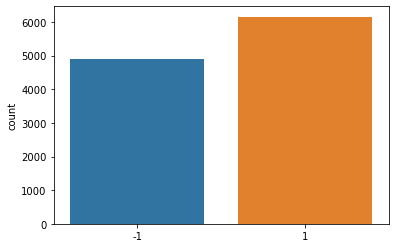

In [21]:
sns.countplot(PhishingY)

In [22]:
# As a result, I used SMOTE Techniques for balance the dataset. 
# SMOTE oversamples all classes by default to give them the same number of examples as the class with the most.

In [23]:
from imblearn.over_sampling import SMOTE
Phishing_mote=SMOTE(k_neighbors=4)
PhishingX,PhishingY = Phishing_mote.fit_resample(PhishingX,PhishingY)

In [24]:
# finally, you can see balancing dataset.
# these balancing datset we will apply with classifier for best accuracy.

<AxesSubplot:ylabel='count'>

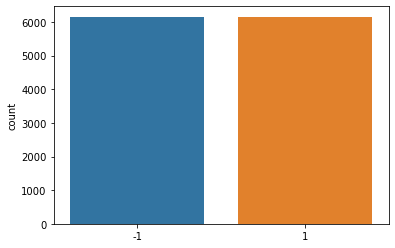

In [25]:
sns.countplot(PhishingY)

In [26]:
# we simply used the sklearn library to split the data into train and test samples and divided these inside an 80–20 ratio.
Phishing_xtr_attack1, Phishing_xts_attack1, Phishing_ytr_attack1, Phishing_yts_attack1 = train_test_split(PhishingX, PhishingY, test_size=0.20, random_state=17)  # the Phishing dataset is dividing for train and test part at the start of your modelling operation.

In [27]:
# For the highest accuracy, I used the XGBhoost classifier.
# XGBClassifier MODEL TRAINING AND TUNING
# A hyperparameter is a variable that controls the topology of a network or how it is trained.
# In contrast to other metrics obtained from the training process, such as node weights.

                Model  Accuracy  Precision    Recall  F1 Score
0  XGBoost Classifier  0.984978   0.981775  0.988827  0.985288


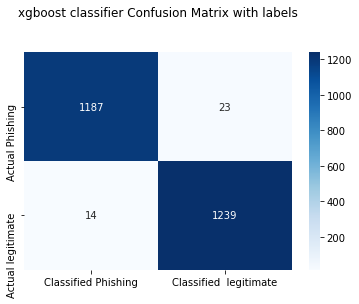

In [28]:
Phishing_xgbattack1_classifier = xgb.XGBClassifier(n_estimators = 1000,  eval_metric='mlogloss')
Phishing_xgbattack1_classifier.fit(Phishing_xtr_attack1, Phishing_ytr_attack1)
Phishing_predclass = Phishing_xgbattack1_classifier.predict(Phishing_xts_attack1)
Phishing_accuracy_attack = accuracy_score(Phishing_yts_attack1, Phishing_predclass)
PhishingPre_Phishing = precision_score(Phishing_yts_attack1, Phishing_predclass)
phihsingRecall_Phishing = recall_score(Phishing_yts_attack1, Phishing_predclass)
phishingF1_Phishing = f1_score(Phishing_yts_attack1, Phishing_predclass)
results = pd.DataFrame([['XGBoost Classifier', Phishing_accuracy_attack, PhishingPre_Phishing, phihsingRecall_Phishing, phishingF1_Phishing]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)
# display confusion Matrix
Phishing_confusion_mtx = confusion_matrix(Phishing_yts_attack1, Phishing_predclass)
Phishing_attack = sns.heatmap(Phishing_confusion_mtx, annot=True, cmap='Blues',fmt='d')
Phishing_attack.set_title('xgboost classifier Confusion Matrix with labels\n\n');

Phishing_attack.yaxis.set_ticklabels(['Actual Phishing','Actual legitimate'])
Phishing_attack.xaxis.set_ticklabels(['Classified Phishing','Classified  legitimate'])
# Ploting the Confusion Matrix for Phishing attack Label.
plt.show()

In [29]:
# **Light Gradient Boosted Machine**, 
# or LightGBM, is an open-source package that implements the gradient boosting technique in an effective manner.
# After that, I'll use train data to fit the model and calculate the accuracy score.
# This statistic, as the name says, measures how well classifier predicts outcomes.
# Precision is the ratio of expected positive values to actual positive values..
# Predictive accuracy is the percentage of real positive values anticipated correctly.
# Recall and Precision measures may be calculated using 
# the F-score. Instead of using the Arithmetic Mean, the Harmonic Mean is employed.
# Confusion matrix: In a matrix format, the confusion matrix shows the actual vs. 
# predicted values and summarises the true negative, false positive, false negative, and true positive values.

            Model  Accuracy  Precision   Recall  F1 Score
0  LGBMClassifier  0.976857   0.975358  0.97925    0.9773


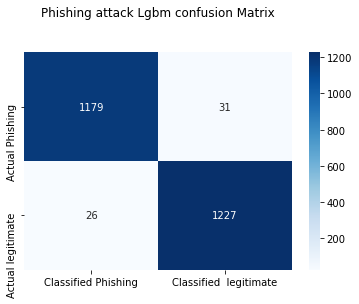

In [30]:
# build the lightgbm model
Phishing_LGBattack1_classifier = lgb.LGBMClassifier()
Phishing_LGBattack1_classifier.fit(Phishing_xtr_attack1, Phishing_ytr_attack1)
# predict the results
Phishing_LGBPredict_classifier=Phishing_LGBattack1_classifier.predict(Phishing_xts_attack1)
Phishing_accuracy_attack = accuracy_score(Phishing_yts_attack1, Phishing_LGBPredict_classifier)
PhishingPre_Phishing = precision_score(Phishing_yts_attack1, Phishing_LGBPredict_classifier)
phihsingRecall_Phishing = recall_score(Phishing_yts_attack1, Phishing_LGBPredict_classifier)
phishingF1_Phishing = f1_score(Phishing_yts_attack1, Phishing_LGBPredict_classifier)
results = pd.DataFrame([['LGBMClassifier', Phishing_accuracy_attack, PhishingPre_Phishing, phihsingRecall_Phishing, phishingF1_Phishing]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)
Phishing_confusion_mtx = confusion_matrix(Phishing_yts_attack1, Phishing_LGBPredict_classifier)
Phishing_attack = sns.heatmap(Phishing_confusion_mtx, annot=True, cmap='Blues',fmt='d')
Phishing_attack.set_title('Phishing attack Lgbm confusion Matrix\n\n');

Phishing_attack.yaxis.set_ticklabels(['Actual Phishing','Actual legitimate'])
Phishing_attack.xaxis.set_ticklabels(['Classified Phishing','Classified  legitimate'])
## Ploting the confusion matrix for lgbm classifier on Phishing attack labels.
plt.show()